# Car Price Prediction

### Load Data

In [23]:
import pandas as pd
## csv saved from kaggle: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
# upload data from csv
car = pd.read_csv('/Users/Jewel/Desktop/Car-Price-Prediction/car details.csv')

In [24]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### EDA & Cleaning

In [25]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [26]:
car.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [27]:
car.describe()
#selling price is in Indian Rupees ($ = ~ 75 rupees)

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Feature Engineering

In [28]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [29]:
#see different items in each column
for x in car.columns:
    print(x, '-------\n', car[x].value_counts())

name -------
 Maruti Swift Dzire VDI                   69
Maruti Alto 800 LXI                      59
Maruti Alto LXi                          47
Maruti Alto LX                           35
Hyundai EON Era Plus                     35
                                         ..
Hyundai Xcent 1.2 VTVT E Plus             1
Ford Figo Aspire Titanium Plus Diesel     1
Tata Nexon 1.2 Revotron XZ Plus           1
Hyundai Verna Transform CRDi VGT ABS      1
Ford Figo 1.2P Ambiente MT                1
Name: name, Length: 1491, dtype: int64
year -------
 2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64
selling_price -------
 300000     162
250000     125
350000     122
550000     107
600000     103
  

In [30]:
#car name has lots of different options, might be too specific/not be a good indicator
#we can narrow to brand name
car.name.unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [31]:
brand_name = []
for x in car.name:
    y = x.split(' ')
    brand_name.append(y[0])

brand_name[:10]

['Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Honda',
 'Maruti',
 'Hyundai',
 'Tata',
 'Hyundai',
 'Maruti']

In [32]:
car = car.drop(['name'], axis = 1)
car['brand_name'] = brand_name

In [33]:
car.brand_name.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Ambassador          4
Volvo               4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Kia                 1
Isuzu               1
Force               1
Name: brand_name, dtype: int64

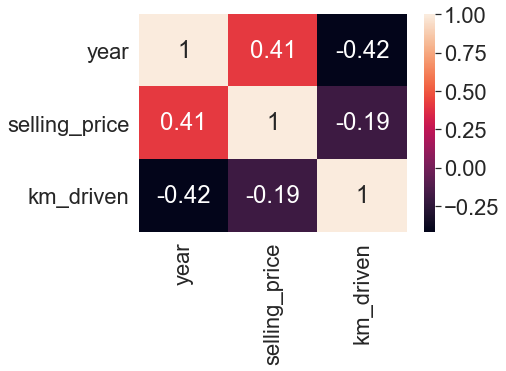

In [34]:
import seaborn as sns

sns.heatmap(car.corr(), annot= True);

In [35]:
#dummify columns so that they are binary
car_dummies = pd.get_dummies(car, drop_first = True)

In [36]:
car_dummies.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_name_Mercedes-Benz,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,2007,60000,70000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
car_dummies.shape
#rows, columns

(4340, 42)

## Modeling
predicting sale price from other info given

### Set up variables for modeling

In [38]:
#split predictors and target variable

X = car_dummies.copy()
y = X.pop('selling_price')


In [39]:
#split train & test groups

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [40]:
#standardize X values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Linear Regression

In [41]:
#linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# get cross validated scores
scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", lr_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lr_model.score(X_test, y_test))

Cross-validated training scores: [0.67441092 0.69248436 0.586318   0.58781546 0.72300983]
Mean cross-validated training score: 0.6528077115596085

Training Score: 0.6738150778052534
Test Score: 0.7469137053146722


In [42]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lr_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,176111.733307,176111.733307
brand_name_Mercedes-Benz,174012.670750,174012.670750
year,166754.096223,166754.096223
brand_name_Audi,130810.742083,130810.742083
fuel_Diesel,108555.965541,108555.965541
transmission_Manual,-95545.869544,95545.869544
brand_name_Land,89545.016821,89545.016821
brand_name_Toyota,80375.275000,80375.275000
brand_name_Volvo,55203.282712,55203.282712
brand_name_Jaguar,52021.320529,52021.320529


Text(0, 0.5, 'Feature')

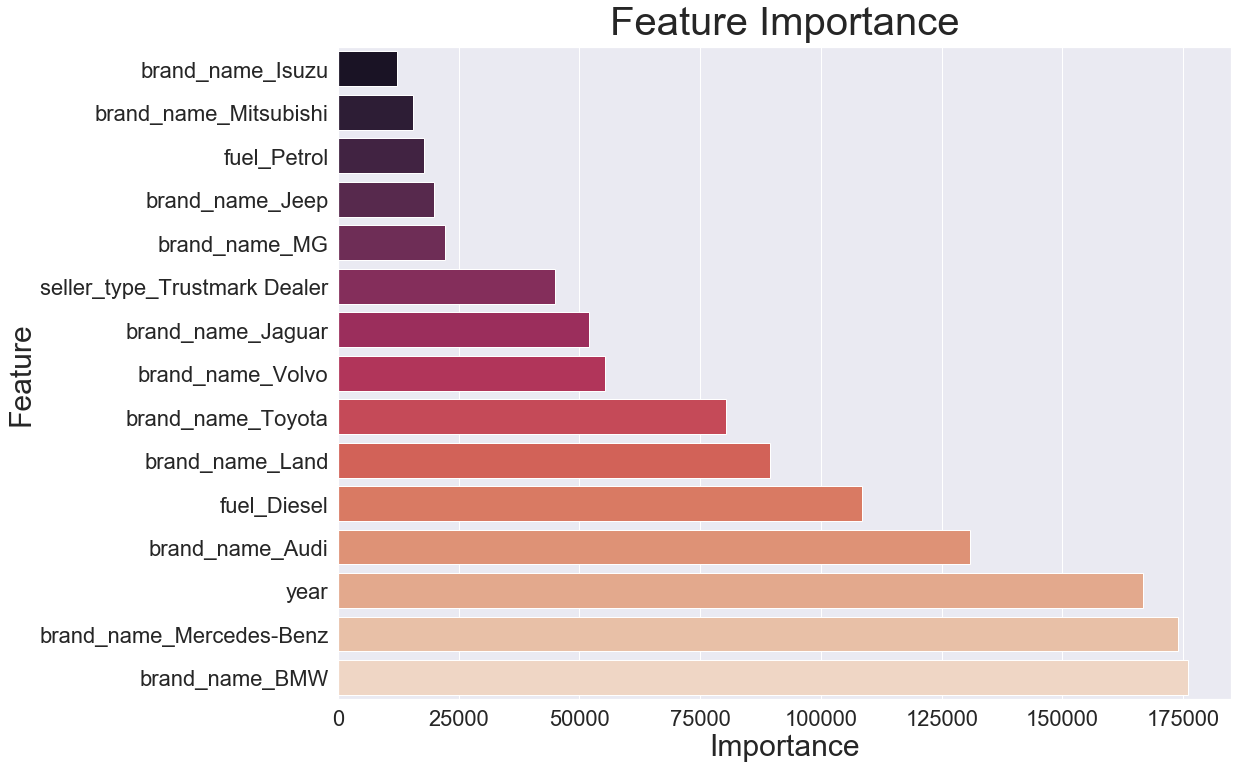

In [43]:
import matplotlib.pyplot as plt
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lr_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

### Ridge CV

In [44]:
from sklearn.linear_model import RidgeCV
import numpy as np

# create a RidgeCV model instance
ridge_model = RidgeCV(alphas=np.logspace(-10, 10, 30), cv=5)
# fit the model
ridge_model.fit(X_train, y_train)

#mean cv score on training data
scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", ridge_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", ridge_model.score(X_test, y_test))


Cross-validated training scores: [0.66139482 0.70136495 0.58523828 0.60263639 0.72469402]
Mean cross-validated training score: 0.6550656892529262

Training Score: 0.673622753600176
Test Score: 0.7463832536986226


In [45]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(ridge_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,171756.469454,171756.469454
brand_name_Mercedes-Benz,169603.879510,169603.879510
year,162979.972007,162979.972007
brand_name_Audi,126593.493793,126593.493793
transmission_Manual,-97672.207000,97672.207000
brand_name_Land,87569.684218,87569.684218
fuel_Diesel,80300.519746,80300.519746
brand_name_Toyota,76615.610554,76615.610554
brand_name_Volvo,53785.876836,53785.876836
brand_name_Tata,-52627.731774,52627.731774


Text(0, 0.5, 'Feature')

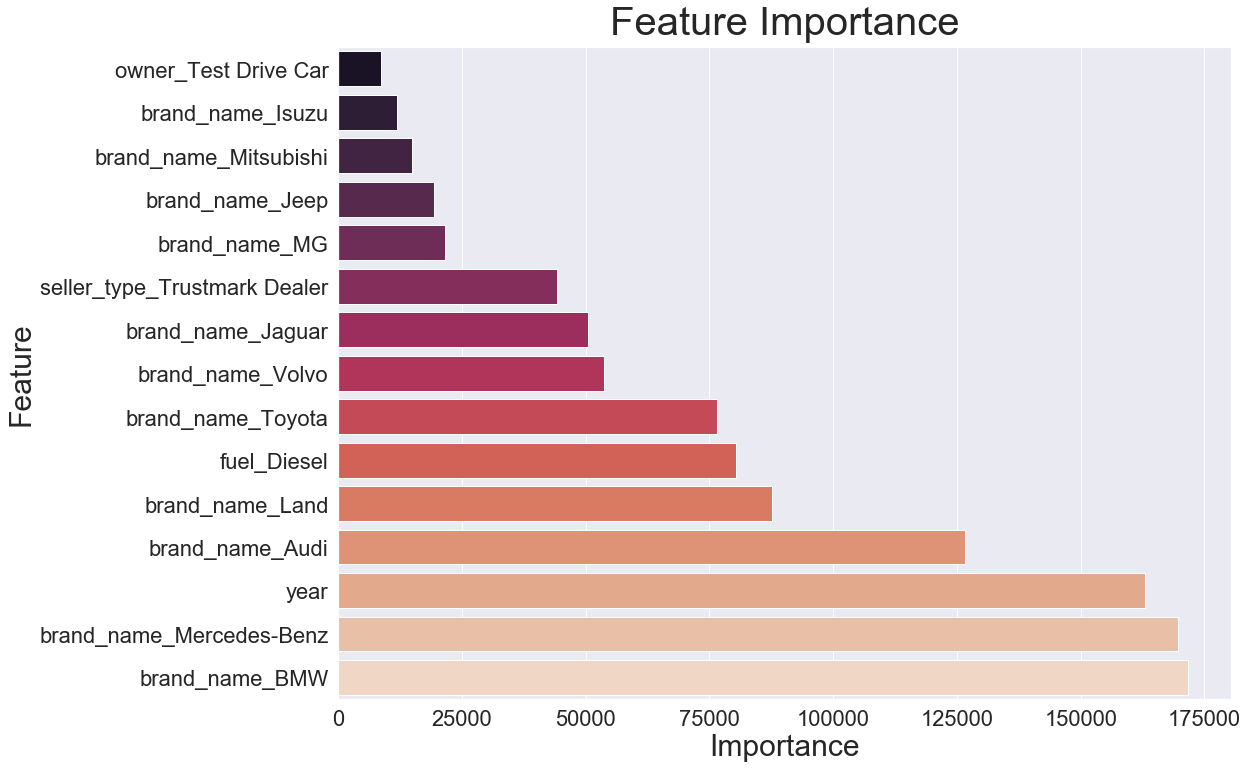

In [46]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': ridge_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

### Lasso CV

In [47]:
from sklearn.linear_model import LassoCV

# create a LassoCV model instance
lasso_model = LassoCV(eps= [.0001, .001, .01, .1], alphas=np.logspace(-8, 8, 20), max_iter = 1000000, cv=5)
# fit the model
lasso_model.fit(X_train, y_train)

# evaluate on the training set
training_score = lasso_model.score(X_train, y_train)
# evaluate on the test set
test_score = lasso_model.score(X_test, y_test)

#mean cv score on training data
scores = cross_val_score(lasso_model, X_train, y_train, cv=5)


print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", lasso_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lasso_model.score(X_test, y_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2760463102106.5312, tolerance: 76933323239.31024
  tol, rng, random, positive)


Cross-validated training scores: [0.67716397 0.69263193 0.586318   0.58900821 0.72300983]
Mean cross-validated training score: 0.653626385287969

Training Score: 0.673695820423442
Test Score: 0.7469564666914239


In [48]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(lasso_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,181726.536509,181726.536509
brand_name_Mercedes-Benz,179420.038248,179420.038248
year,166262.390751,166262.390751
brand_name_Audi,137745.612813,137745.612813
transmission_Manual,-96415.423431,96415.423431
brand_name_Toyota,94407.836155,94407.836155
brand_name_Land,90940.065455,90940.065455
fuel_Diesel,90514.340225,90514.340225
brand_name_Volvo,56590.310006,56590.310006
brand_name_Jaguar,53672.792969,53672.792969


Text(0, 0.5, 'Feature')

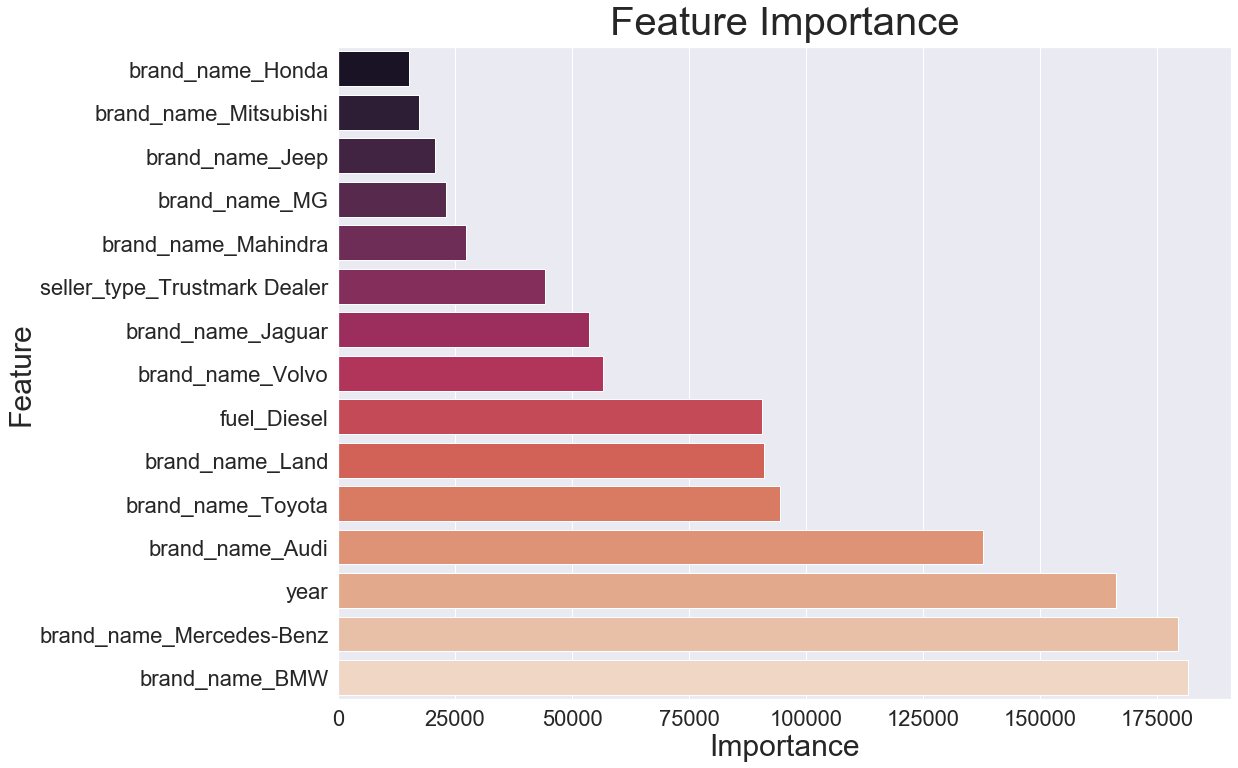

In [49]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lasso_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

### Elastic Net CV

In [50]:
#Elastic net model with scores
from sklearn.linear_model import ElasticNetCV

enet_model = ElasticNetCV(alphas=np.logspace(-4, 4, 10), 
                     l1_ratio=np.array([.1, .5, .7, .9, .95, .99, 1]),
                     max_iter = 100000,
                     cv=5)
# fit the model
enet_model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', enet_model.alpha_)
# get the best l1-ratio
print('Best l1-ratio:', enet_model.l1_ratio_)

# evaluate on the training set
training_score = enet_model.score(X_train, y_train)
# evaluate on the test set
test_score = enet_model.score(X_test, y_test)

#mean cv score on training data
scores = cross_val_score(enet_model, X_train, y_train, cv=5)

print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
print()
#training score
print("Training Score:", enet_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", enet_model.score(X_test, y_test))

Best alpha: 0.046415888336127774
Best l1-ratio: 0.7
Cross-validated training scores: [0.67331483 0.69744927 0.58456595 0.59579796 0.72361959]
Mean cross-validated training score: 0.6549495211011569

Training Score: 0.6736483076656555
Test Score: 0.7464486361340276


In [51]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(enet_model.coef_, index=X_train.columns,
                       columns=['coefficients'])

# calculate the absolute values of the coefficients to gauge influence (show importance of predictor variables)
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values(by = 'coef_abs', ascending = False)[:10]

,coefficients,coef_abs
brand_name_BMW,172031.315877,172031.315877
brand_name_Mercedes-Benz,169886.046642,169886.046642
year,163290.149717,163290.149717
brand_name_Audi,126834.314122,126834.314122
transmission_Manual,-97502.205857,97502.205857
brand_name_Land,87704.276065,87704.276065
fuel_Diesel,81689.987665,81689.987665
brand_name_Toyota,76720.683618,76720.683618
brand_name_Volvo,53872.379796,53872.379796
brand_name_Tata,-52692.358703,52692.358703


Text(0, 0.5, 'Feature')

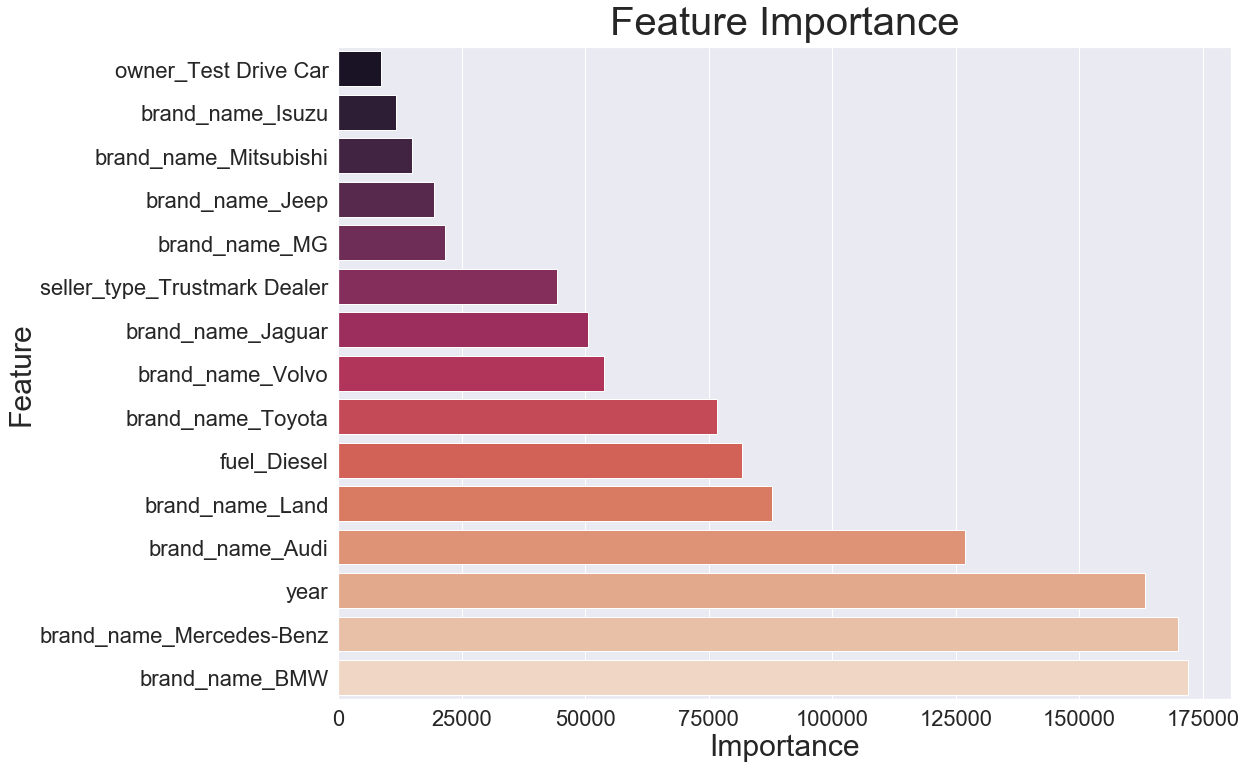

In [52]:
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': enet_model.coef_
})

fi.sort_values('importance', ascending=True, inplace=True)

#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

## Best model = Ridge CV

In [53]:
predictions = ridge_model.predict(X_test)
residuals_df = pd.DataFrame(predictions, y_test)
residuals_df.reset_index(inplace = True)
residuals_df.rename({'selling_price': 'actual', 0: 'predictions'}, axis = 1, inplace = True)
residuals_df['residuals'] = residuals_df.actual - residuals_df.predictions
residuals_df

,actual,predictions,residuals
0,675000,841405.753380,-166405.753380
1,450000,469426.161625,-19426.161625
2,390000,428772.997257,-38772.997257
3,239000,338537.378927,-99537.378927
4,665000,601761.675504,63238.324496
...,...,...,...
863,195000,180853.906911,14146.093089
864,220000,412589.504634,-192589.504634
865,185000,203018.865488,-18018.865488
866,775000,755758.514766,19241.485234


Text(0, 0.5, 'Actual')

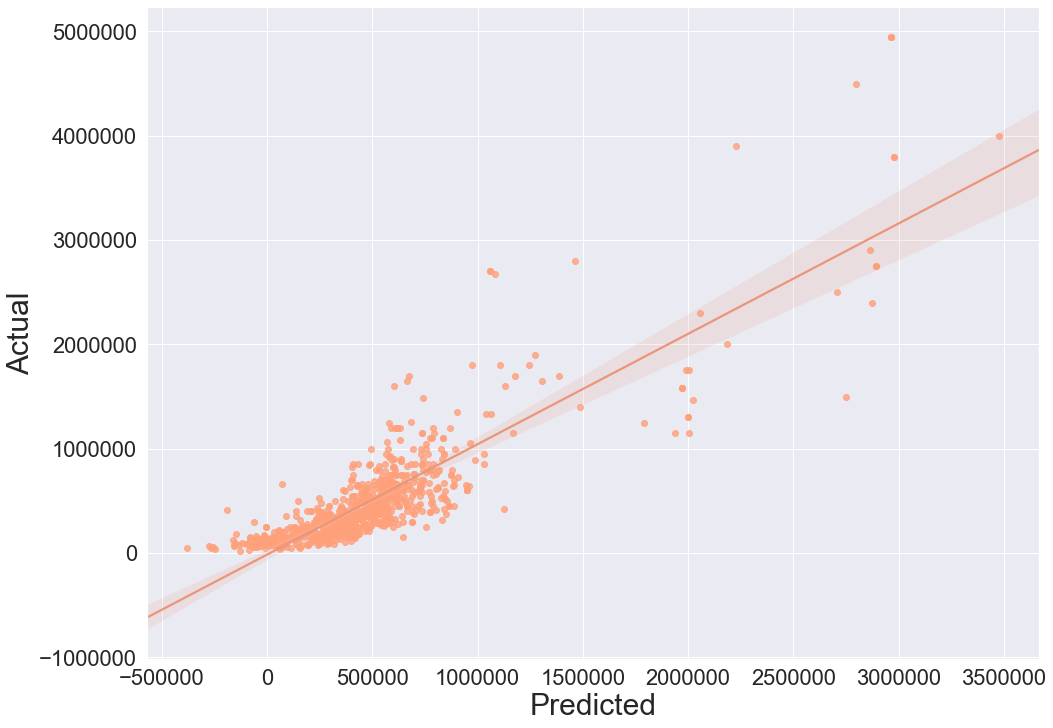

In [61]:
#predicted y values
predictions = ridge_model.predict(X_test)

#residuals (or error between predictions and actual)
residuals = y_test - predictions

sns.axes_style(style='white')

sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
ax = sns.regplot(x="predictions", y="actual", data= residuals_df,  scatter_kws = {'color': 'lightsalmon'}, 
                 line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)


In [55]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, predictions))**0.5
#predictions are acurate within about 277,100 rupees which is about $3700

277099.1795364127